<a href="https://colab.research.google.com/github/josemarcelovg/GOOGLE-COLLAB/blob/main/Evaluacion_4_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Fundamentos de Machine Learning <br> <br> Evaluación 3 </center>

### Importar Librerías

In [ ]:
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
from google.colab import files

from sklearn import datasets
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

from sklearn import linear_model
import kagglehub
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, f1_score, roc_auc_score, recall_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import GradientBoostingClassifier

### Carga de Data Set

In [ ]:
# Download latest version
dataset_path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

df = pd.read_csv(f'{dataset_path}/hotel_bookings.csv')
display(df.head())

#juntar stays_in_weekend_nights y stays_in_week_nights

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,0,0,13,2015,July,27,1,0,1,1,...,0,0,304.0,0,0,75.0,0,0,Check-Out,2015-07-02
4,0,0,14,2015,July,27,1,0,2,2,...,0,0,240.0,0,0,98.0,0,1,Check-Out,2015-07-03
5,0,0,14,2015,July,27,1,0,2,2,...,0,0,240.0,0,0,98.0,0,1,Check-Out,2015-07-03
7,0,0,9,2015,July,27,1,0,2,2,...,0,0,303.0,0,0,103.0,0,1,Check-Out,2015-07-03
8,0,1,85,2015,July,27,1,0,3,2,...,0,0,240.0,0,0,82.0,0,1,Canceled,2015-05-06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Análisis Exploratorio

Realice un Análisis Exploratorio. Considere crear las celdas que estime necesarias en esta sección para mantener el mejor order posible.

In [ ]:
print(df.shape)

(119390, 32)


In [ ]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
#
df.describe()

,age,bmi,children,charges
count,1205.000000,1262.000000,1327.000000,1338.000000
mean,38.935270,30.588011,1.103994,13270.422265
std,14.055034,6.087442,1.206333,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4740.287150
50%,39.000000,30.300000,1.000000,9382.033000
75%,51.000000,34.471250,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


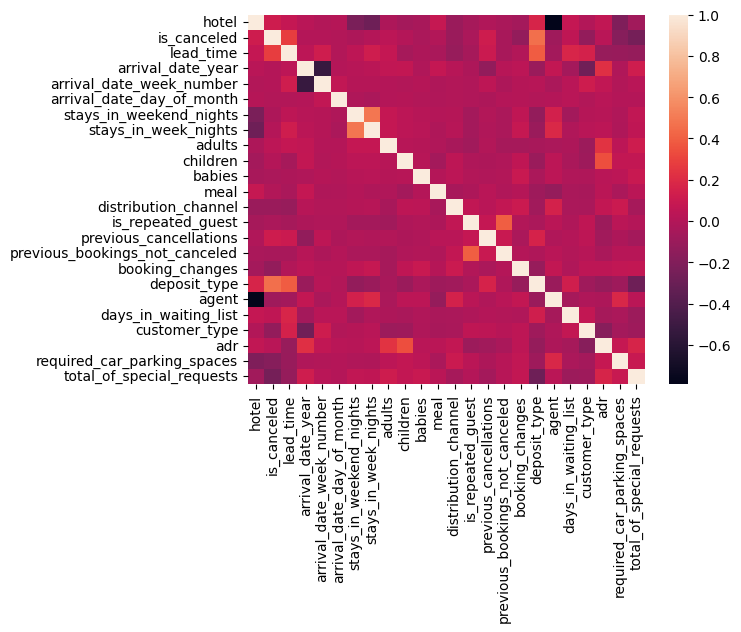

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
hotel,1.000000,0.116237,0.070860,0.023912,-0.001085,0.008135,-0.231985,-0.280023,-0.023438,-0.058166,...,-0.007864,-0.037883,-0.059643,0.166433,-0.790229,0.074329,-0.002419,0.061281,-0.213978,-0.072150
is_canceled,0.116237,1.000000,0.277666,0.004561,0.004172,-0.005468,-0.023589,0.003918,0.037057,0.005409,...,0.117983,-0.042589,-0.131714,0.459075,-0.081939,0.052475,-0.130644,0.023284,-0.188298,-0.257934
lead_time,0.070860,0.277666,1.000000,0.041082,0.120155,-0.003472,0.047674,0.124195,0.072477,-0.049796,...,0.100271,-0.045082,-0.000282,0.386007,-0.068753,0.170352,0.146998,-0.112652,-0.111226,-0.123047
arrival_date_year,0.023912,0.004561,0.041082,1.000000,-0.530387,0.005206,0.020693,0.032807,0.061359,0.065394,...,-0.134031,0.015334,0.036468,-0.099551,0.063684,-0.061742,-0.276615,0.222059,-0.012864,0.121490
arrival_date_week_number,-0.001085,0.004172,0.120155,-0.530387,1.000000,0.057587,0.010114,0.013212,0.003496,-0.000687,...,0.042645,-0.025095,0.008551,0.015243,-0.030993,0.023822,0.118054,0.062570,-0.001477,0.021639
arrival_date_day_of_month,0.008135,-0.005468,-0.003472,0.005206,0.057587,1.000000,-0.016510,-0.030852,0.001151,0.013545,...,-0.024869,0.001447,0.011505,-0.006060,0.001731,0.024778,-0.005497,0.025590,0.004745,0.002560
stays_in_weekend_nights,-0.231985,-0.023589,0.047674,0.020693,0.010114,-0.016510,1.000000,0.486350,0.070997,0.039961,...,-0.003021,-0.028041,0.054693,-0.130869,0.141387,-0.064610,0.012440,0.016233,-0.011037,0.056110
stays_in_week_nights,-0.280023,0.003918,0.124195,0.032807,0.013212,-0.030852,0.486350,1.000000,0.071890,0.039922,...,-0.013591,-0.029082,0.081598,-0.102644,0.183281,-0.009330,0.024332,0.036263,-0.016376,0.050318
adults,-0.023438,0.037057,0.072477,0.061359,0.003496,0.001151,0.070997,0.071890,1.000000,0.014385,...,-0.003366,-0.054299,-0.051995,-0.042626,-0.034489,-0.022945,-0.096503,0.237099,0.036907,0.116793
children,-0.058166,0.005409,-0.049796,0.065394,-0.000687,0.013545,0.039961,0.039922,0.014385,1.000000,...,-0.025070,-0.009899,0.055324,-0.099860,0.041242,-0.036455,-0.087618,0.335729,0.065531,0.068130


In [ ]:
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix)

plt.show()

df.corr(numeric_only=True, method='pearson')

### Preparación de los Datos

Realice la Preparación de los Datos. Considere realización de los siguientes pasos:
- Tratamientos de valores nulos
- Transformación de Variables
- Normalización de Valores

Puede crear las celdas que estime necesarias en esta sección para mantener el mejor order posible.

In [ ]:
df.drop(['company'], axis=1, inplace=True)

In [ ]:
# Eliminar filas con valores nulos
df = df.dropna()

In [ ]:
#transformacion de variables
#ENCODING
df.replace({"Resort Hotel":0, "City Hotel":1}, inplace=True)
df['hotel'].head()

/tmp/ipython-input-5-919458348.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Resort Hotel":0, "City Hotel":1}, inplace=True)


,hotel
3,0
4,0
5,0
7,0
8,0


In [ ]:
df.replace({"BB":1, "HB":2, "SC":3, "FB":4, "Undefined":0}, inplace=True)
df['meal'].head()

/tmp/ipython-input-6-629218530.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"BB":1, "HB":2, "SC":3, "FB":4, "Undefined":0}, inplace=True)


,meal
3,1
4,1
5,1
7,4
8,1


In [ ]:
df.replace({"Online TA":0, "Offline TA/TO":1, "Groups":2, "Direct":3, "Corporate":4, 'Complementary':5, 'Aviation':6, "Undefined": 7}, inplace=True)
df['market_segment'].head()

/tmp/ipython-input-7-2941327488.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Online TA":0, "Offline TA/TO":1, "Groups":2, "Direct":3, "Corporate":4, 'Complementary':5, 'Aviation':6, "Undefined": 7}, inplace=True)


,market_segment
3,4
4,0
5,0
7,3
8,0


In [ ]:
df.replace({"TA/TO":0, "GDS":3, "Direct":1, "Corporate":2, "Undefined":4}, inplace=True) # Added more distribution channels for replacement
df['distribution_channel'].head()

/tmp/ipython-input-8-2533226225.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"TA/TO":0, "GDS":3, "Direct":1, "Corporate":2, "Undefined":4}, inplace=True) # Added more distribution channels for replacement


,distribution_channel
3,4
4,0
5,0
7,3
8,0


In [ ]:
df.replace({"No Deposit":0, "Non Refund":1, "Refundable":2}, inplace=True)
df['deposit_type'].head()

/tmp/ipython-input-9-1967103361.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"No Deposit":0, "Non Refund":1, "Refundable":2}, inplace=True)


,deposit_type
3,0
4,0
5,0
7,0
8,0


In [ ]:
df.replace({"Transient":0, "Transient-Party":1, "Contract":2, "Group":3}, inplace=True)
df['customer_type'].head()

/tmp/ipython-input-10-1058120918.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Transient":0, "Transient-Party":1, "Contract":2, "Group":3}, inplace=True)


,customer_type
3,0
4,0
5,0
7,0
8,0


In [ ]:
#Total de huéspedes
df['total_guests'] = df['adults'] + df['children'] + df['babies']
#Precio por huésped
df['adr_per_guest'] = df['adr'] / (df['total_guests'].replace(0, 1))
#Interacción de cliente frecuente + cambios
df['previous_cancellations_x_changes'] = df['previous_cancellations'] * df['booking_changes']
#Lead time normalizado por número de huéspedes
df['lead_time_per_guest'] = df['lead_time'] / (df['total_guests'].replace(0, 1))
#Duración estimada * anticipación
df['stay_duration'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df['stay_duration_x_lead'] = df['stay_duration'] * df['lead_time']


In [ ]:
#normalizar age
df['age'] = (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())
df['age'].head()

,age
2,0.217391
3,0.326087
4,0.304348
7,0.413043
8,0.413043


### Implementación de Modelos

Cree y entrene al menos 3 modelos que sean aplicables al set de datos. Puede crear las celdas que estime necesarias en esta sección para mantener el mejor order posible.

In [ ]:
X = pd.DataFrame(data=df, columns=['lead_time_per_guest', 'previous_cancellations_x_changes', 'previous_bookings_not_canceled', 'deposit_type', 'customer_type', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'market_segment', 'distribution_channel', 'adr_per_guest'])
y = df['is_canceled']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [ ]:

models = {
    "Logistic Regression": LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(random_state=25),
    "Random Forest": RandomForestClassifier(random_state=25),
    "Gbost": GradientBoostingClassifier(random_state=25),
}

print("Evaluación de modelos con métricas adicionales:\n")

for name, model in models.items():

    # Pipeline completo para cada modelo
    pipeline = Pipeline(steps=[
        ('pca', PCA(n_components=0.95)),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    try:
        y_proba = pipeline.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_proba)
    except AttributeError:
        # Algunos modelos como SVM con certain kernels no implementan predict_proba
        y_proba = None
        roc = "No disponible"

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    print(f"{name}:")
    print(f" Accuracy:  {acc:.4f}")
    print(f" Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f" ROC AUC:   {roc:.4f}")
    print(" Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print(" Clasificación detallada:")
    print(classification_report(y_test, y_pred))

Evaluación de modelos con métricas adicionales:

Logistic Regression:
 Accuracy:  0.6339
 Precision: 0.5346
Recall:    0.4848
F1 Score:  0.5085
 ROC AUC:   0.6717
 Matriz de Confusión:
[[9149 3392]
 [4141 3897]]
 Clasificación detallada:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71     12541
           1       0.53      0.48      0.51      8038

    accuracy                           0.63     20579
   macro avg       0.61      0.61      0.61     20579
weighted avg       0.63      0.63      0.63     20579

Decision Tree:
 Accuracy:  0.7490
 Precision: 0.6815
Recall:    0.6708
F1 Score:  0.6761
 ROC AUC:   0.7373
 Matriz de Confusión:
[[10021  2520]
 [ 2646  5392]]
 Clasificación detallada:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80     12541
           1       0.68      0.67      0.68      8038

    accuracy                           0.75     20579
   macro avg       0.74      0

### Métricas de Evaluación

Evalúe los modelos implementados. Considere que este proceso es iterativo, por lo que recomienda modificación de hiperparámetros para tratar de obtener los mejores resultados posibles. Puede crear las celdas que estime necesarias en esta sección para mantener el orden.

In [ ]:
# Hiperparámetros para Random Forest

pipelineR = Pipeline(steps=[
    ('pca', PCA(n_components=0.95)),
    ('classifier', RandomForestClassifier(random_state=25))
])

param_grid_rf = {
    'classifier__n_estimators': [50, 150],
    'classifier__max_depth': [5, 15],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__bootstrap': [True, False]
}

grid_rf = GridSearchCV(
    estimator=pipelineR,
    param_grid=param_grid_rf,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Mejores parámetros - Random Forest:")
print(grid_rf.best_params_)

Mejores parámetros - Random Forest:
{'classifier__bootstrap': False, 'classifier__max_depth': 15, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


In [ ]:

# Hiperparámetros para DecisionTree
pipelineD = Pipeline(steps=[
    ('pca', PCA(n_components=0.95)),
    ('classifier', DecisionTreeClassifier(random_state=25))
])

param_grid_dt = {
    'classifier__max_depth': [50, 100],
    'classifier__min_samples_split': [1,4, 6],
    'classifier__min_samples_leaf': [2, 4, 6],
}

grid_dt = GridSearchCV(
    estimator=pipelineD, param_grid=param_grid_dt, cv=10,scoring='f1', n_jobs=-1
)
grid_dt.fit(X_train, y_train)

print("Mejores parámetros - Decision Tree:")
print(grid_dt.best_params_)


Mejores parámetros - Decision Tree:
{'classifier__max_depth': 100, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 4}


In [ ]:
#hiperparametros para logistic

pipelineL = Pipeline(steps=[
    ('pca', PCA(n_components=0.95)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=25))
])

param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear'],
    'classifier__class_weight': [None, 'balanced']
}

grid_lr = GridSearchCV(
    estimator=pipelineL, param_grid=param_grid_lr, cv=10, scoring='f1', n_jobs=-1
)
grid_lr.fit(X_train, y_train)

print("Mejores parámetros - Logistic Regression:")
print(grid_lr.best_params_)


Mejores parámetros - Logistic Regression:
{'classifier__C': 0.01, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [ ]:
#hiperparametros para Gbost

pipelineG = Pipeline(steps=[
    ('pca', PCA(n_components=0.95)),
    ('classifier', GradientBoostingClassifier(random_state=25))
])

param_grid_g = {
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 3],
}

grid_g = GridSearchCV(
    estimator=pipelineG, param_grid=param_grid_g, cv=10, scoring='f1', n_jobs=-1
)
grid_g.fit(X_train, y_train)

print("Mejores parámetros - Gradient Boosting Classifier:")
print(grid_g.best_params_)


Mejores parámetros - Gradient Boosting Classifier:
{'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


In [ ]:

# Predecir con modelos optimizados
y_pred_dt = grid_dt.best_estimator_.predict(X_test)
y_proba_dt = grid_dt.best_estimator_.predict_proba(X_test)[:, 1]

#y_pred_rf = grid_rf.best_estimator_.predict(X_test)
#y_proba_rf = grid_rf.best_estimator_.predict_proba(X_test)[:, 1]

y_pred_lg = grid_dt.best_estimator_.predict(X_test)
y_proba_lg = grid_dt.best_estimator_.predict_proba(X_test)[:, 1]

# Evaluar modelos optimizados
print("📊 Evaluación con modelos optimizados:\n")

for name, y_pred, y_proba in [
    ("Decision Tree", y_pred_dt, y_proba_dt),
    #("Random Forest", y_pred_rf, y_proba_rf)
    ("Logistic Regression", y_pred, y_proba_dt)
]:
    print(f" {name} Optimizado:")
    print(f"  Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"  Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"  Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"  F1 Score:  {f1_score(y_test, y_pred):.4f}")
    print(f"  ROC AUC:   {roc_auc_score(y_test, y_proba):.4f}")
    print("  Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("  Clasificación detallada:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

📊 Evaluación con modelos optimizados:

🔹 Decision Tree Optimizado:
  Accuracy:  0.7522
  Precision: 0.7000
  Recall:    0.6398
  F1 Score:  0.6686
  ROC AUC:   0.7574
  Matriz de Confusión:
[[10337  2204]
 [ 2895  5143]]
  Clasificación detallada:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     12541
           1       0.70      0.64      0.67      8038

    accuracy                           0.75     20579
   macro avg       0.74      0.73      0.74     20579
weighted avg       0.75      0.75      0.75     20579

------------------------------------------------------------
🔹 Logistic Regression Optimizado:
  Accuracy:  0.7682
  Precision: 0.7291
  Recall:    0.6469
  F1 Score:  0.6856
  ROC AUC:   0.7574
  Matriz de Confusión:
[[10609  1932]
 [ 2838  5200]]
  Clasificación detallada:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     12541
           1       0.73      0.65      0

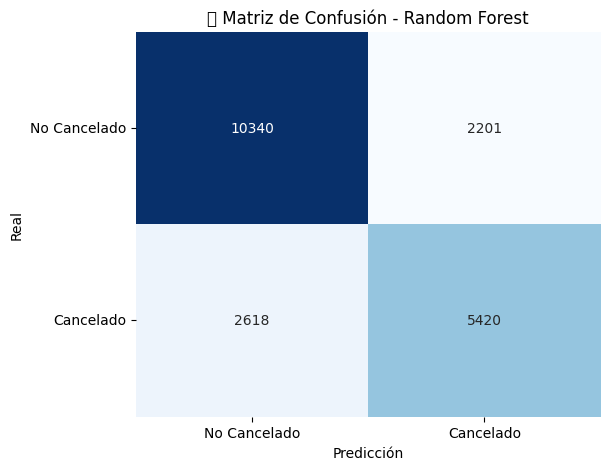

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Graficar
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("🔍 Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.xticks([0.5, 1.5], ["No Cancelado", "Cancelado"])
plt.yticks([0.5, 1.5], ["No Cancelado", "Cancelado"], rotation=0)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades
y_proba = grid_lr.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar ROC
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('📈 Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Prediccion de los modelos con formulario

### Elección de Modelo

Escoja y justifique la elección del mejor modelo trabajado por el grupo de trabajo.

| Pauta de Evaluación - Evaluación 3                                                                                  |
|----------------------------------------------------------------------------------------------------------|
| Sigue a la estructura del proyecto basándose en la metodología CRISP-DM utilizando el formato dispuesto para la evaluación. |
| Identifica oportunidades de mejora en el proyecto entre entregas, moviéndose entre fases de la metodología con el fin de profundizar de mejor manera en la problemática. |
| Utiliza el formato de Jupyter Notebook, aprovechando cuadros de código, markdown, títulos e índices cuando corresponde. |
| Reconoce las características que tiene un problema de regresión, eligiendo un target numérico continuo para el entrenamiento del modelo de ML. |
| Utiliza al menos las librerías de Scikit learn, pandas y numpy para el desarrollo del modelo de ML en la tarea de regresión. |
|Realiza la división del dataset en algún porcentaje recomendado por las buenas prácticas de la industria para entrenamiento y prueba. |
|Entrena al menos 3 alternativas de modelos de regresión seleccionando cual es el que se adapta mejor a los datos dada la naturaleza del algoritmo implementado.|
|Utiliza las métricas y las interpreta correctamente basándose en el tipo de tarea desarrollada, y considerando al menos coef. de determinación, MAE, MSE y RMSE. |
|Justifica cual es el mejor modelo entrenado de acuerdo con el resultado obtenido considerando el problema de regresión con las métricas correspondientes.|
|Aplica el modelo predictivo desarrollado en un entorno interactivo como un formulario, permitiendo el ingreso de un nuevo registro a predecir.|